In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# INTRODUCTION

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

# Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

# DATA

, you will see a data module that is named Telco customer churn. It contains 5 tables:

Demographics
Location
Population
Services
Status

# LOAD DATASET

In [2]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly # used for the plotting
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as po
from sklearn import metrics
%matplotlib inline 


In [3]:
#data original
df= pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Here in this dataset TotalCharges is given as Object but we have convert it into float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')
df['TotalCharges'].dtype
# Here we successesfully convert datatpe of TotalCharges into float value .

dtype('float64')

In [7]:
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').astype('object')
df['SeniorCitizen'].dtypes

dtype('O')

In [8]:
# Replace target variable in YES and No.
df['Churn'].replace({'Yes':'1','No':'0'},inplace=True)

In [9]:
# Covariance And Correlation
print('Covariance')
display(df.cov(numeric_only=True))
print('n\Correlation')
display(df.corr(numeric_only=True))

Covariance


,tenure,MonthlyCharges,TotalCharges
tenure,603.168108,183.196987,4.595074e+04
MonthlyCharges,183.196987,905.410934,4.440133e+04
TotalCharges,45950.743236,44401.333073,5.138252e+06


n\Correlation


,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


In [10]:
for i in df.columns:
    print("No.of unique values in",i,"is",df[i].nunique())

No.of unique values in customerID is 7043
No.of unique values in gender is 2
No.of unique values in SeniorCitizen is 2
No.of unique values in Partner is 2
No.of unique values in Dependents is 2
No.of unique values in tenure is 73
No.of unique values in PhoneService is 2
No.of unique values in MultipleLines is 3
No.of unique values in InternetService is 3
No.of unique values in OnlineSecurity is 3
No.of unique values in OnlineBackup is 3
No.of unique values in DeviceProtection is 3
No.of unique values in TechSupport is 3
No.of unique values in StreamingTV is 3
No.of unique values in StreamingMovies is 3
No.of unique values in Contract is 3
No.of unique values in PaperlessBilling is 2
No.of unique values in PaymentMethod is 4
No.of unique values in MonthlyCharges is 1585
No.of unique values in TotalCharges is 6530
No.of unique values in Churn is 2


In [11]:
# store the categorical columns and numerical columns in different variables .
cat_cols = ['gender','Dependents','MultipleLines','StreamingTV','StreamingMovies',
           'Contract','Partner','PhoneService','InternetService','OnlineSecurity',
           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling',
           'PaymentMethod','SeniorCitizen','Churn']


num_cols=['tenure','MonthlyCharges','TotalCharges']



In [12]:
cat_variation = dict()

for col in cat_cols:
    df_abc = df[col].unique().tolist()
    df_abc.sort()
    cat_variation[col] = (', '.join(str(item) for item in df_abc))

df_abc = pd.Series(cat_variation)
df_variation_categorical = pd.DataFrame(df_abc).T.rename({0:'data variation'})
df_variation_categorical.T

,data variation
gender,"Female, Male"
Dependents,"No, Yes"
MultipleLines,"No, No phone service, Yes"
StreamingTV,"No, No internet service, Yes"
StreamingMovies,"No, No internet service, Yes"
Contract,"Month-to-month, One year, Two year"
Partner,"No, Yes"
PhoneService,"No, Yes"
InternetService,"DSL, Fiber optic, No"
OnlineSecurity,"No, No internet service, Yes"


In [13]:
num_variation = dict()

for col in num_cols:
    df_abc = (f'{df[col].min()} - {df[col].max()}')
    num_variation[col] = df_abc

df_abc = pd.Series(num_variation)
df_variation_numerical = pd.DataFrame(df_abc).T.rename({0:'data variation'})
df_variation_numerical.T

,data variation
tenure,0 - 72
MonthlyCharges,18.25 - 118.75
TotalCharges,18.8 - 8684.8


In [14]:
data_variation = pd.concat([df_variation_numerical,df_variation_categorical], axis=1)
data_variation.T

,data variation
tenure,0 - 72
MonthlyCharges,18.25 - 118.75
TotalCharges,18.8 - 8684.8
gender,"Female, Male"
Dependents,"No, Yes"
MultipleLines,"No, No phone service, Yes"
StreamingTV,"No, No internet service, Yes"
StreamingMovies,"No, No internet service, Yes"
Contract,"Month-to-month, One year, Two year"
Partner,"No, Yes"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.shape

(7043, 21)

In [17]:
# again here senior citizen convert numrical to catagorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [18]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [19]:
df.isnull().sum()
# the coad 'data.isnull().sum()' calculated the sum of the missing values in each columns of the dataset

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Cheaking The Missing Values And Handling The MIssing Value

In [20]:
# cheaking missing values..
data_missing_TotalCharges=df[df['TotalCharges'].isnull()]
data_not_missing_TotalCharges=df[~df['TotalCharges'].isnull()]
print("Describe the missing data: ")
display(data_missing_TotalCharges.describe())
print("\nDescribe the non-missing data: ")
display(data_not_missing_TotalCharges.describe())

Describe the missing data: 


,tenure,MonthlyCharges,TotalCharges
count,11.0,11.000000,0.0
mean,0.0,41.418182,NaN
std,0.0,23.831484,NaN
min,0.0,19.700000,NaN
25%,0.0,20.125000,NaN
50%,0.0,25.750000,NaN
75%,0.0,58.975000,NaN
max,0.0,80.850000,NaN



Describe the non-missing data: 


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [21]:
# handling missing data
# fill na with the median
numeric_columns=['TotalCharges']
for nc in numeric_columns:
    df.loc[df[nc].isnull(),nc]=df[nc].mean()

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Drop CustomerId Column

In [24]:
df=df.drop(['customerID'],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# outliers analysis with IQR method

In [27]:
x = ['tenure','MonthlyCharges','TotalCharges']
def count_outliers(data,col):
    q1=data[col].quantile(0.25,interpolation='nearest')
    q2=data[col].quantile(0.5,interpolation='nearest')
    q3=data[col].quantile(0.75,interpolation='nearest')
    q4=data[col].quantile(1,interpolation='nearest')
    IQR = q3-q1
    global LLP
    global ULP
    LLP =q1 -1.5*IQR
    ULP = q3+ 1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print("NO OUTLIERS IN",i)
    else:
        print("THERE ARE OUTLIERS IN ",i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>UPL][col].size
        a.append(i)
        print("Count of outliers are",x=y)
global a 
a = []
for i in x:
    count_outliers(df,i)

NO OUTLIERS IN tenure
NO OUTLIERS IN MonthlyCharges
NO OUTLIERS IN TotalCharges


DATA VIS

In [28]:
plot_by_churn_labels = df ["Churn"].value_counts().keys().tolist()
plot_by_churn_values = df ["Churn"].value_counts().values.tolist()

plot_data=[
    go.Pie(labels=plot_by_churn_labels,
           values=plot_by_churn_values,
          marker=dict(colors=['Red','Green'],
                     line = dict(color="White",
                                width=1.5)),
           rotation=90,
           hoverinfo="label+value+text",
           hole=.6)
]
plot_layout = go.Layout(dict(title="Customer Churn",
                    plot_bgcolor="rgb(243,243,243)",
                    paper_bgcolor="rgb(243,243,243)",))
fig=go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [29]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

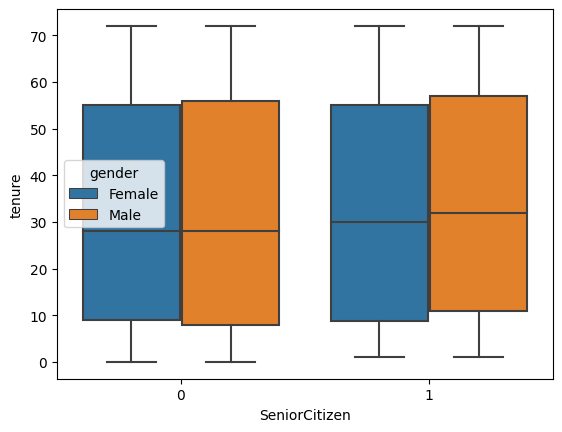

In [30]:
sns.boxplot(x='SeniorCitizen',y='tenure',data=df,hue='gender')
plt.show()

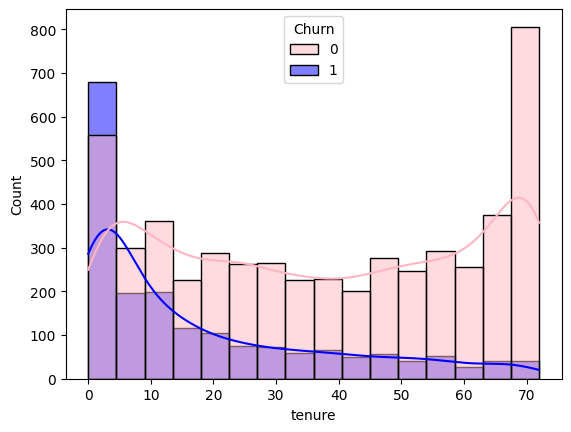

In [31]:
sns.histplot(data=df,x='tenure',kde=True ,hue ="Churn",
            palette=['lightpink','blue'])
plt.show()

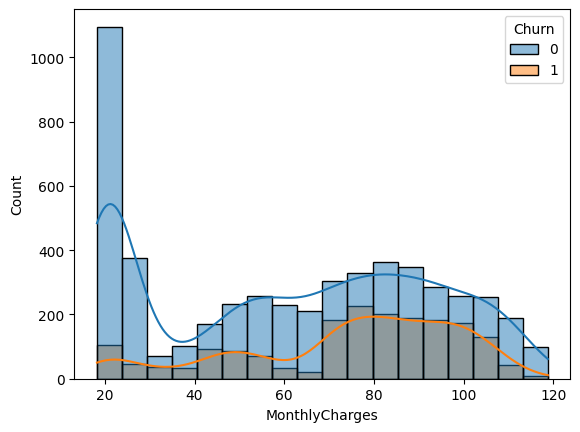

In [32]:
sns.histplot(data=df,x='MonthlyCharges',kde=True ,hue ="Churn")
plt.show()

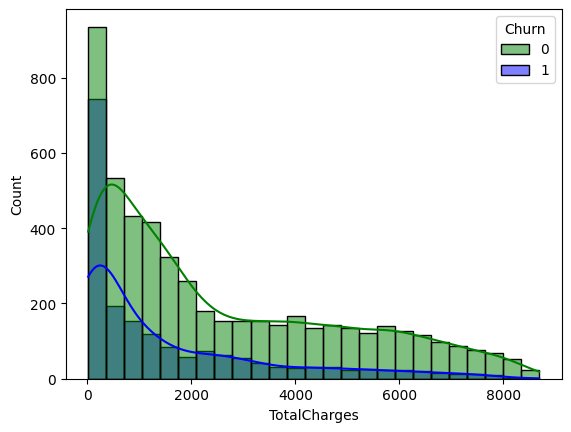

In [33]:
sns.histplot(data=df,x='TotalCharges',kde=True ,hue ="Churn",
                palette=['green','blue'])
plt.show()


In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
feature=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [36]:
list (enumerate(feature))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'DeviceProtection'),
 (10, 'TechSupport'),
 (11, 'StreamingTV'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod')]

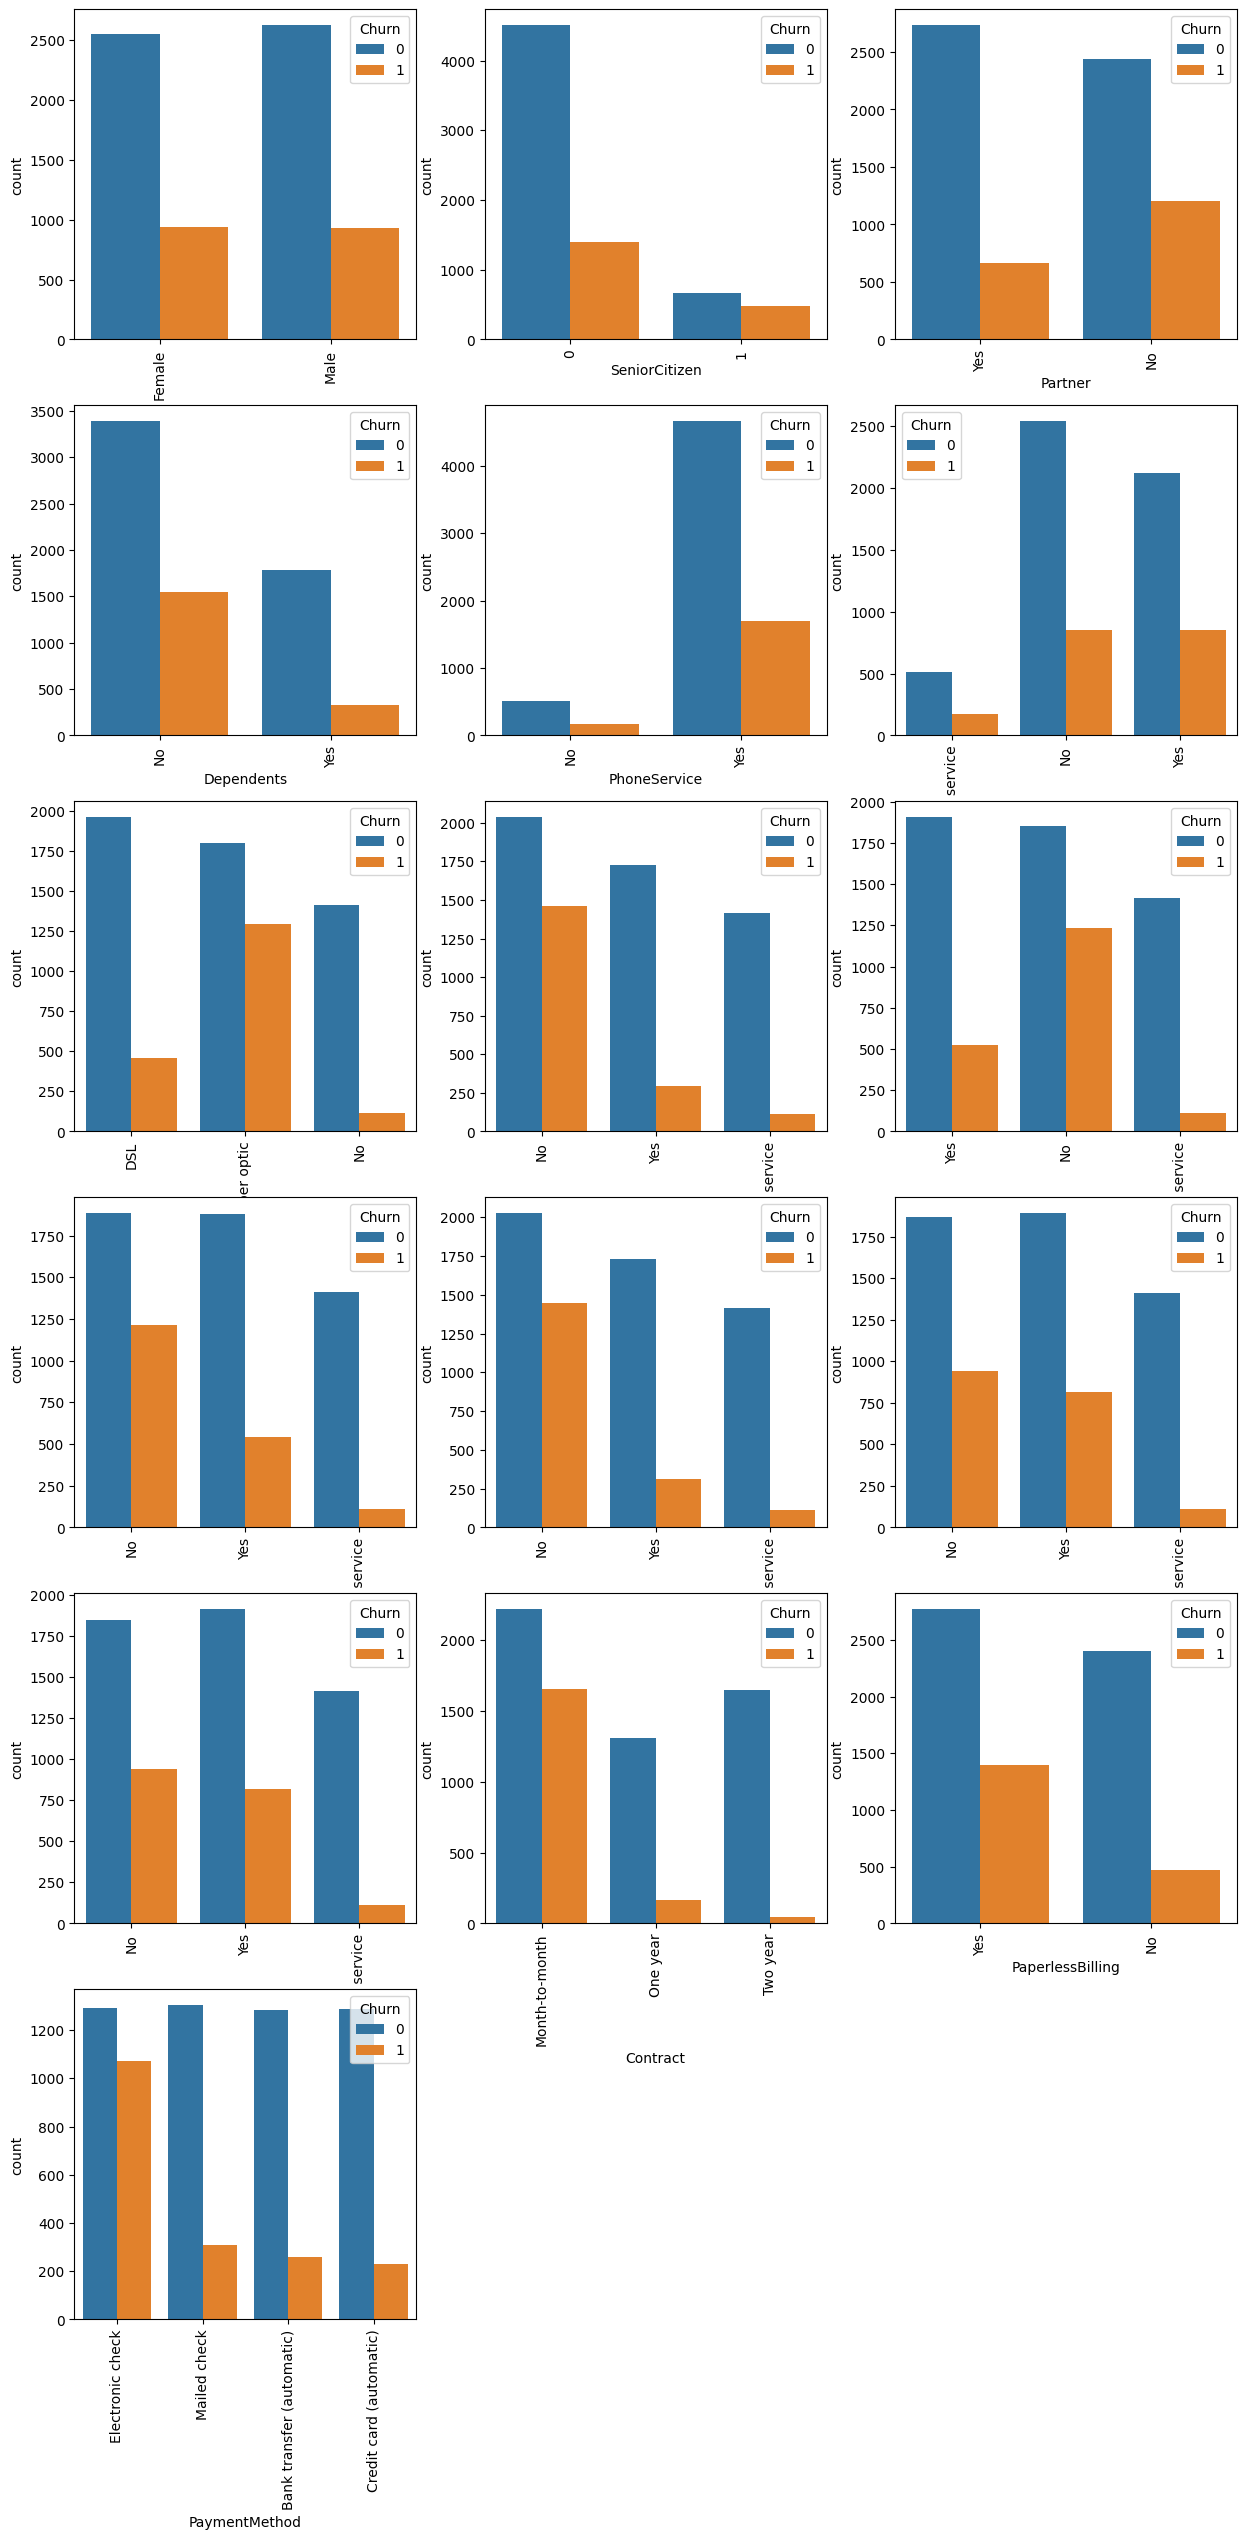

In [37]:
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1],hue='Churn',data=df)
    plt.xticks(rotation = 90)

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Dummmey variable encoder

In [39]:
df=pd.get_dummies(data=df,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],drop_first=True,dtype=int)

In [40]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


In [42]:
# Mean of num_cols.
df[num_cols].mean()

tenure            0.449599
MonthlyCharges    0.462803
TotalCharges      0.261309
dtype: float64

In [43]:
# std of num_cols
df[num_cols].std()

tenure            0.341104
MonthlyCharges    0.299403
TotalCharges      0.261366
dtype: float64

# Data splite

Dividing the dataset and sepreted the targeted column from it

In [44]:
X = df.loc[:,df.columns != 'Churn_1']

Y = df['Churn_1']

Dividing the dataset into training and testing dataset . Since this is the only data avaible to us , we keepaside a holdout /test set to evaluated our model ata the end in order to estimated our chosen model performance on unseen data/ new data.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [46]:
scaler.fit(df.drop(['Churn_1'],axis=1))
scaled_features=scaler.transform(df.drop('Churn_1',axis=1))

In [47]:
from sklearn.model_selection import train_test_split
X=scaled_features
Y=df['Churn_1']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=44)

# Machine learning in Logistick Regression Random Forest and Desicion Tree¶

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [49]:
predLR=logmodel.predict(X_test)

In [50]:
print(classification_report(Y_test,predLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



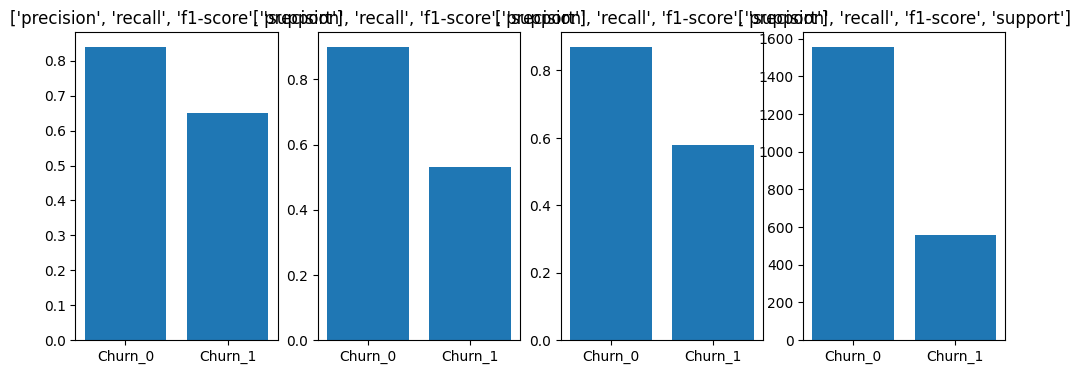

In [51]:
# calculated the classification report
report=classification_report(Y_test,predLR,target_names=['Churn_0','Churn_1'])

#splite the report into line
lines=report.split('\n')

# splite each line in parts 
parts=[line.split() for line in lines[2:-5]]

#extract the matrics into parts
class_metrics = dict()
for part in parts:
    class_metrics [part[0]] = {'precision':float(part[1]), 'recall':float(part[2]), 'f1-score':float(part[3]), 'support':int(part[4])}
        
#creat a bar chart for each metric
fig,ax=plt.subplots(1,4,figsize=(12,4))
metrics  =  ['precision',  'recall',  'f1-score',  'support']
for i,metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(),[class_metrics[key][metric]for key in class_metrics.keys()])
    ax[i].set_title(metrics)
            
#display the plot
plt.show()

In [52]:
confusion_matrix_LR = confusion_matrix(Y_test,predLR)

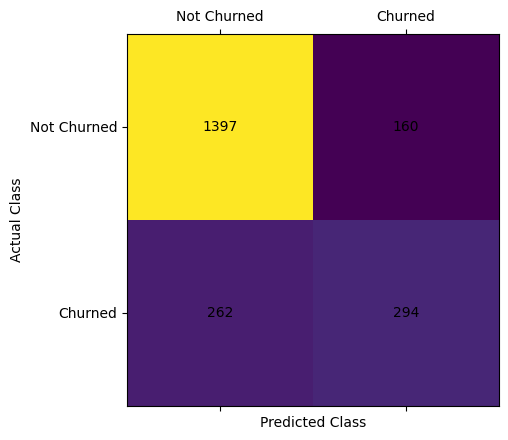

In [53]:
#creat a heatmap of the matrix using matshow()
plt.matshow(confusion_matrix(Y_test, predLR))
    
#add label for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_LR[i,j],ha='center',va='center')
        
#add custom Label for x and y ticket
plt.xticks([0,1],["Not Churned","Churned"])
plt.yticks([0,1],["Not Churned","Churned"])
plt.show()

In [54]:
logmodel.score(X_train,Y_train)

0.8062880324543611

In [55]:
accuracy_score(Y_test, predLR)

0.8002839564600095

# SUPPORT VECORT MACHINE 

In [56]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
y_pred_svc = svc.predict(X_test)

In [57]:
print(classification_report(Y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [58]:
confusion_matrix_svc = confusion_matrix(Y_test,y_pred_svc)

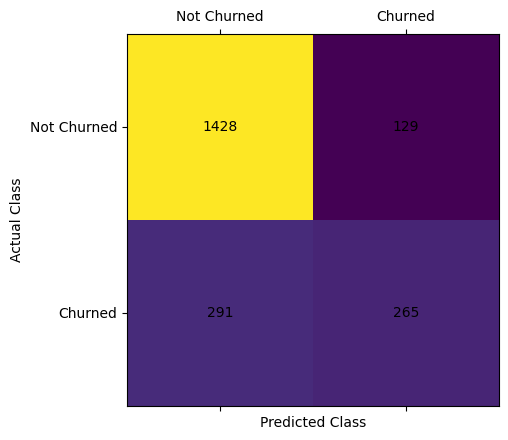

In [59]:
 #create a heatmap of the matrix using matshow()
plt.matshow(confusion_matrix_svc)

#add Label for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range (2):
        plt.text(j,i,confusion_matrix_svc[i,j],ha='center',va='center')
        
#add custom label for x and y ticks
plt.xticks([0,1],["Not Churned","Churned"])
plt.yticks([0,1],["Not Churned","Churned"])
plt.show()

In [60]:
svc.score(X_train,Y_train)

0.8170385395537525

In [61]:
accuracy_score(Y_test,predLR)

0.8002839564600095

# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred_dtc=dtc.predict(X_test)

In [63]:
print(classification_report(Y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1557
           1       0.46      0.47      0.46       556

    accuracy                           0.71      2113
   macro avg       0.63      0.64      0.63      2113
weighted avg       0.72      0.71      0.71      2113



In [64]:
confusion_matrix_dtc = confusion_matrix(Y_test,y_pred_dtc)

In [65]:
#creat a heatmap of the matrix using matshow()
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train,Y_train)

y_pred_dtc = dtc.predict(X_test)

In [66]:
print(classification_report(Y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1557
           1       0.47      0.48      0.47       556

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [67]:
confusion_matrix_dtc = confusion_matrix(Y_test,y_pred_dtc)

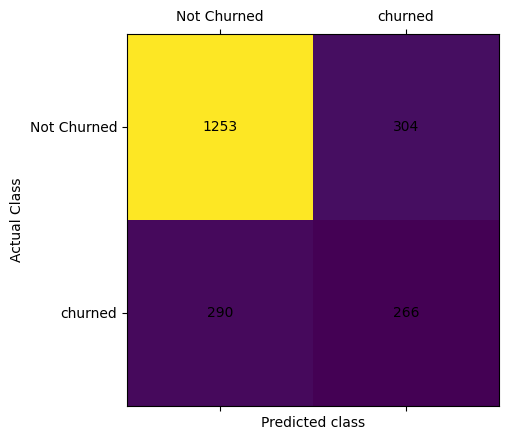

In [68]:
#creat a heatmap of the matrix using matshow(
plt.matshow(confusion_matrix_dtc)

#add label for the x and y axes

plt.xlabel('Predicted class')
plt.ylabel('Actual Class')

for i in range (2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_dtc[i,j],ha='center',va='center')
        
#add custom label for x and y ticks

plt.xticks([0,1],["Not Churned","churned"])
plt.yticks([0,1],["Not Churned","churned"])
plt.show()


In [69]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [70]:
accuracy_score(Y_test,y_pred_dtc)

0.7188831045906294

# roc & auc

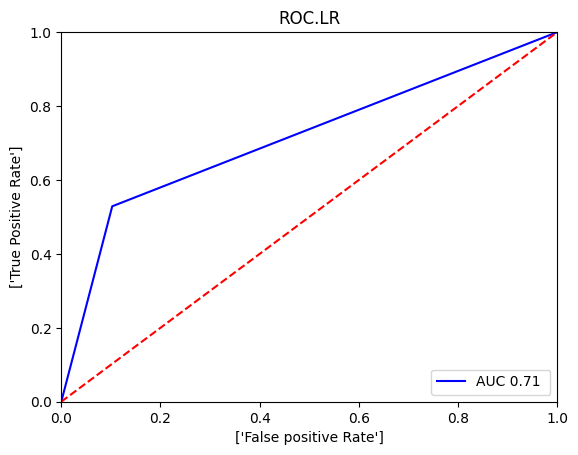

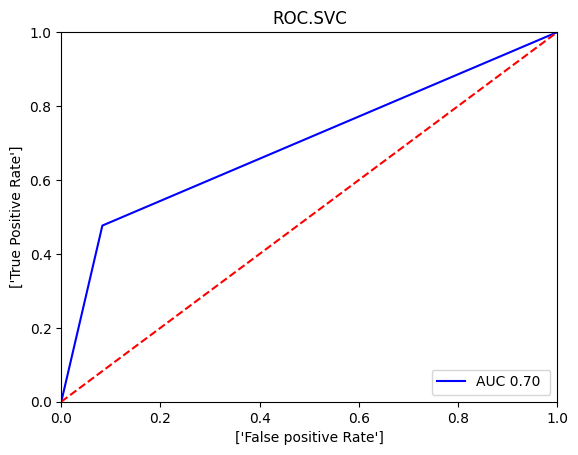

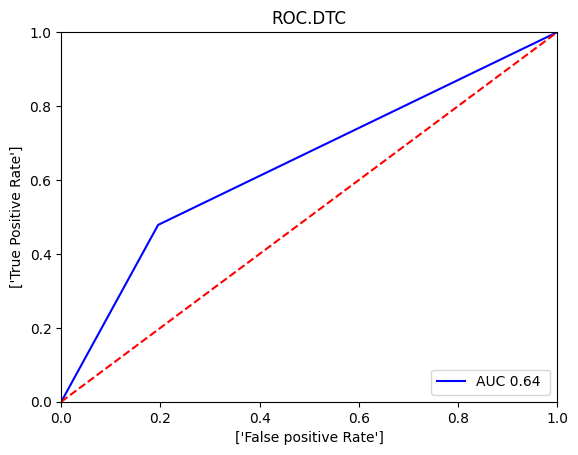

In [71]:
# auc roc 
# calculated the the threshold to linear regrestion
from sklearn import metrics

frp,trp,threshold = metrics.roc_curve(Y_test,predLR)
roc_auc = metrics.auc(frp,trp)

plt.title('ROC.LR')
plt.plot(frp,trp,'b',label = 'AUC %0.2f ' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel(['True Positive Rate'])
plt.xlabel(['False positive Rate'])
plt.show()


# calculate the threshhold to support vector machine

frp,trp,threshold = metrics.roc_curve(Y_test,y_pred_svc)
roc_auc = metrics.auc(frp,trp)

plt.title('ROC.SVC')
plt.plot(frp,trp,'b',label = 'AUC %0.2f ' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel(['True Positive Rate'])
plt.xlabel(['False positive Rate'])
plt.show()

# calculated the threshhold to DEcion tree

frp,trp,threshold = metrics.roc_curve(Y_test,y_pred_dtc)
roc_auc = metrics.auc(frp,trp)

plt.title('ROC.DTC')
plt.plot(frp,trp,'b',label = 'AUC %0.2f ' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel(['True Positive Rate'])
plt.xlabel(['False positive Rate'])
plt.show()



# Solving Data Imbalance

In [72]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(Y_train)
print('BEFORE', counter)
smt = SMOTE()
x_train_sm,y_train_sm = smt.fit_resample(X_train,Y_train)
counter = Counter(y_train_sm)
print('AFTER',counter)

BEFORE Counter({0: 3617, 1: 1313})
AFTER Counter({0: 3617, 1: 3617})
